In [1]:
# The goal is to check if the Smith-Smolin scheme with repetition code  along with 2-way comm is better than Asymptotic Adaptive
import numpy as np
from scipy.special import binom
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:



def joint_prob(u, v, r, m, px, py, pz):
    #u: X error, v Zerror, r syndrome with weight r, m number of repetitions
    first_term = (px + py) ** (u * (m - 2 * r) + r) * (1 - px - py) ** ((1 - u) * (m - 2 * r) + r)
    second_term = (px - py) ** (u * (m - 2 * r) + r) * (1 - px - py - 2 * pz) ** ((1 - u) * (m - 2 * r) + r)
    return 0.5 * (first_term + (-1) ** v * second_term)


def probability_of_a_syndrome(r, m, px, py, pz):
    # r syndrome with weight r, m number of repetitions
    return joint_prob(0, 0, r, m, px, py, pz) + joint_prob(0, 1, r, m, px, py, pz) + joint_prob(1, 0, r, m, px, py,pz) + joint_prob(1, 1,
                                                                                                                 r, m,
                                                                                                                 px, py,
                                                                                                                 pz)


def new_channel(r, m, px, py, pz):
    # r syndrome with weight r, m number of repetitions
    prob_syndrome = probability_of_a_syndrome(r, m, px, py, pz)
    pI = joint_prob(0, 0, r, m, px, py, pz) / prob_syndrome
    pZ = joint_prob(0, 1, r, m, px, py, pz) / prob_syndrome
    pX = joint_prob(1, 0, r, m, px, py, pz) / prob_syndrome
    pY = joint_prob(1, 1, r, m, px, py, pz) / prob_syndrome
    return pI, pX, pY, pZ


def rate(p):
    pI = p[0]
    pX = p[1]
    pY = p[2]
    pZ = p[3]
    return 1 + pI * np.log2(pI) + pX * np.log2(pX) + pY * np.log2(pY) + pZ * np.log2(pZ)


def concatenated_channel_rate(m, px, py, pz):
    # r syndrome with weight r, m number of repetitions
    concatenated_rate = 0
    for r in range(0, m):
        concatenated_rate += binom(m - 1, r) * probability_of_a_syndrome(r, m, px, py, pz) *max(0, rate(
            new_channel(r, m, px, py, pz)))
    return concatenated_rate / m


def get_best_rate(pX, pY, pZ):
    pvec = [1 - pX - pY - pZ, pX, pY, pZ]
    best_rate = rate(pvec)
    best_number_of_repetitions = 1
    for repetitions in range(2, 37):
        r = concatenated_channel_rate(repetitions, pX, pY, pZ)
        if r >= best_rate:
            best_rate = r
            best_number_of_repetitions = repetitions
    return best_rate


concatenated_best_rate = []
hashing_rate = []
Frange = np.arange(0.6, 1, 0.001)
for F in Frange:
    p = 1-F
    pX = p/3
    pZ = p/3
    pY = p/3


    pvec = [1 - pX - pY - pZ, pX, pY, pZ]
    hashing_rate.append(max(rate(pvec), 0))
    concatenated_best_rate.append(get_best_rate(pX, pY, pZ))






<IPython.core.display.Javascript object>


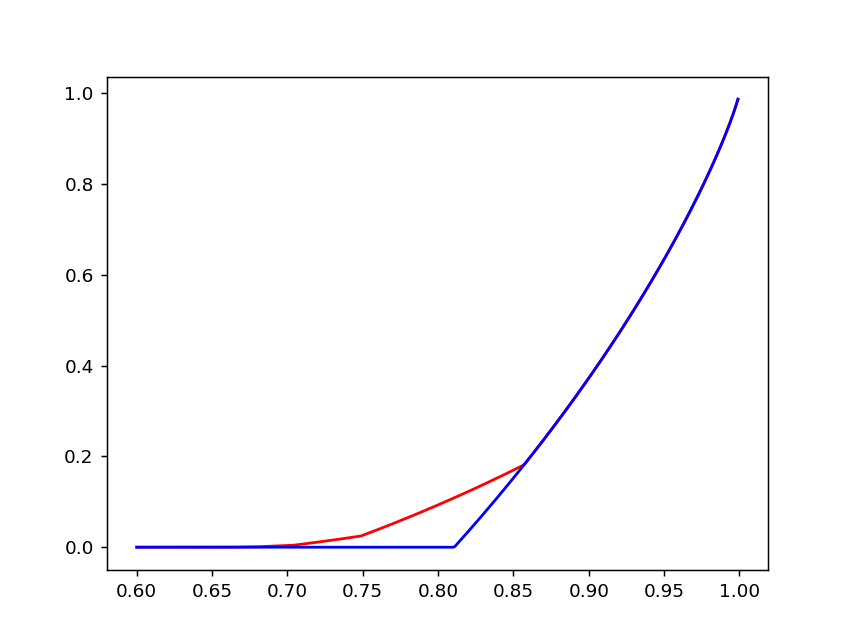

In [3]:
plt.figure()
plt.plot(Frange, concatenated_best_rate, 'r')
plt.plot(Frange, hashing_rate, 'b')
plt.show()